In [33]:
# Start by downloading the data. This will arrive raw, unfiltered. We'll handle that in the next step. This download will take 310.26 GB of space.
from ris_icequakes.download.bulk_dl import download_data
download_data()

[2025-04-29 17:29:19,441] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS, SCEDC, NCEDC, RESIF, GFZ.
[2025-04-29 17:29:19,441] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS, SCEDC, NCEDC, RESIF, GFZ.
[2025-04-29 17:29:19,536] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'NCEDC'.
[2025-04-29 17:29:19,536] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'NCEDC'.
[2025-04-29 17:29:19,538] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 4 client(s): IRIS, SCEDC, RESIF, GFZ.
[2025-04-29 17:29:19,538] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 4 client(s): IRIS, SCEDC, RESIF, GFZ.
[2025-04-29 17:29:19,541] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2025-04-29 17:29:19,541] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2025-04-29 17

In [ ]:
# This failed to download the StationXML file for XH.DR08.xml, so we'll manually get that one
from ris_icequakes.download.sta_inv import get_sta_inv_online

station = 'DR05'

inv = get_sta_inv_online(station)

inv.write(f'stations/XH.{station}.xml', format='STATIONXML')

In [ ]:
# # Now we prep the data for analysis.
# # We'll de‑trend, de‑mean, and remove instrument response.
# import os
# import glob
# import obspy as op
# from ris_icequakes.download.sta_inv import get_sta_inv_online
# from concurrent.futures import ThreadPoolExecutor, as_completed
#
# output_path = 'outputs/prepared_data_cache/'
# input_path = 'outputs/raw_data_cache/'
#
# # --- trace preprocessing ---
# def preprocess_trace(tr, inv):
#     tr.interpolate(sampling_rate=50.0, method='lanczos', a=20)
#     tr.detrend('demean')
#     tr.detrend('linear')
#     tr.taper(max_percentage=0.00025, max_length=20.)
#     pre_filt = [0.0005, 0.001, 22, 25]
#     # tr.remove_response(inventory=inv, pre_filt=pre_filt, output='VEL')
#     # # convert float64 → int32 to save space
#     tr.data = tr.data.astype('int32')
#     return tr
#
# # --- worker ---
# def process_station(date_path: str, sta_path: str) -> None:
#     """
#     Read the three‑component MiniSEED files for one station on one day,
#     preprocess them, and write a single 3‑component stream.
#     """
#     date = os.path.basename(date_path)
#     sta_full_name = os.path.basename(sta_path).replace('_', '.')
#     sta_name = sta_full_name.split('.')[1]
#
#     inv = get_sta_inv_online(sta_name)
#
#     trace_paths = sorted(glob.glob(os.path.join(sta_path, '*.mseed')))
#     if len(trace_paths) != 3:           # skip incomplete days
#         return
#
#     st = op.Stream()
#     for tp in trace_paths:
#         tr = op.read(tp)[0]
#         st.append(preprocess_trace(tr, inv))
#
#     out_file = os.path.join(output_path, date, f'{sta_full_name}.mseed')
#     os.makedirs(os.path.dirname(out_file), exist_ok=True)
#     st.write(out_file, format='MSEED')
#
# # --- job list ---
# date_path_list = sorted(glob.glob(os.path.join(input_path, '*')))
# jobs = [
#     (dp, sp)
#     for dp in date_path_list
#     for sp in sorted(glob.glob(os.path.join(dp, '*')))
# ]
#
# # --- parallel execution (threads avoid pickling issues in notebooks) ---
# with ThreadPoolExecutor() as ex:
#     futures = [ex.submit(process_station, dp, sp) for dp, sp in jobs]
#     for f in as_completed(futures):
#         f.result()      # propagate exceptions

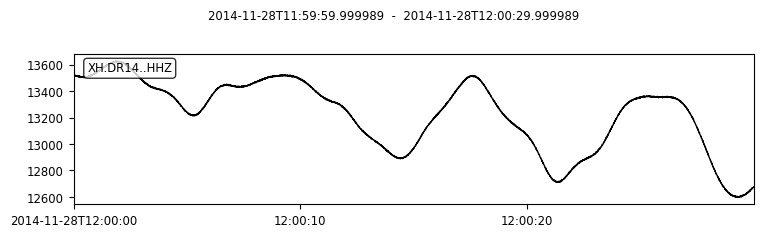

KeyboardInterrupt: 

In [9]:
import obspy as op
from ris_icequakes.download.otf import process_otf
st = op.read('outputs/raw_data_cache/20141128/XH_DR14/HHZ.mseed')
st = st.trim(starttime=op.UTCDateTime(2014, 11, 28, 12, 0, 0),
             endtime=op.UTCDateTime(2014, 11, 28, 12, 0, 30))
st.plot()

tr = op.read('outputs/raw_data_cache/20141128/XH_DR14/HHZ.mseed')[0]
tr = process_otf(tr, fs = 50, pre_filt=[4, 5, 20, 22])
tr.trim(starttime=op.UTCDateTime(2014, 11, 28, 12, 0, 0),
        endtime=op.UTCDateTime(2014, 11, 28, 12, 0, 30))
tr.plot()